# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Assignment 4: Information Gain & Mutual Information

## Learning Objectives

At the end of the experiment, you will be able to

* understand the significance of information gain
* calculate the entropy of a probability distribution
* understand the mutual information and its importance
* find the feature with the best information gain from the given set of features

## Dataset

### Dataset description

The dataset chosen for this assignment is **Mushroom Dataset**. This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended.

source: https://archive.ics.uci.edu/ml/datasets/mushroom

## Information

**Information Gain**

Information Gain measures the reduction in entropy by splitting a dataset according to a given value of a random variable. The largest information gain is equivalent to the smallest entropy.

Entropy quantifies how much information there is in a random variable, or more specifically, its probability distribution. A skewed distribution has low entropy, whereas a distribution where events have equal probability has a larger entropy.

Information Gain is applied to quantify which feature provides maximal information about the classification based on the notion of entropy, i.e., by quantifying the size of uncertainty, disorder, or impurity, in general, with the intention of decreasing the amount of entropy.

**Mutual Information**

Mutual information is a quantity that measures a relationship between two
random variables that are sampled simultaneously. In particular, it measures
how much information is communicated, on average, in one random variable
about another.

For example, suppose X represents the roll of a fair 6-sided die, and Y
represents whether the roll is even. Clearly, the value of Y
tells us something about the value of X and vice versa. That is, these variables
share mutual information.

### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2200132" #@param {type:"string"}

In [ ]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9900170510" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "M1_AST_04_InformationGain_Mutual_Information_A" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")  
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/CDS/Datasets/mushrooms.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://cds.iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


#### Importing required packages

In [ ]:
import numpy as np
import pandas as pd 
import math                    # Math Functions
from math import log2          # log base 2 function
from math import log           # log function
from collections import Counter                      # Keeps track of elements and count
from sklearn.preprocessing import LabelEncoder       # Encoding the labels
from matplotlib import pyplot as plt                 # Visualization

### Entropy

It is a metric to measure the uncertainty of a probability distribution. Low entropy means the distribution varies (peaks and valleys). High entropy means the distribution is uniform.

![img](https://miro.medium.com/max/400/1*M15RZMSk8nGEyOnD8haF-A.png)

From the above figure, the x-axis measures the proportion of data points belonging to the positive class in each bubble, and the y-axis axis measures their respective entropies. Right away, you can see the inverted ‘U’ shape of the graph. Entropy is lowest at the extremes when the bubble either contains no positive instances or only positive instances. That is, when the bubble is pure, the disorder is 0. Entropy is highest in the middle when the bubble is evenly split between positive and negative instances. Extreme disorder because there is no majority.

#### Calculating the entropy
A dataset with a 50/50 split of samples for the two classes would have a maximum entropy of 1, whereas an imbalanced dataset with a split of 10/90 would have a smaller entropy for a randomly drawn example from the dataset. In a binary classification problem (two classes), we can calculate the entropy of the data sample as follows:

Entropy = -(P(0) * log(P(0)) + P(1) * log(P(1)))

We can demonstrate this with an example of calculating the entropy for this imbalanced dataset in Python.

In [ ]:
# proportion of examples in each class
class0 = 10/100
class1 = 90/100
# calculate entropy
entropy = -(class0 * log2(class0) + class1 * log2(class1))
# print the result
print('entropy: %.3f' % entropy)

entropy: 0.469


We define a function to calculate the entropy of a group of samples based on the ratio of samples that belong to class 0 and class 1.

In [ ]:
# lets define a function for entropy
def class_entropy(class0, class1):
    # YOUR CODE HERE
    entropy = -(class0 * log2(class0) + class1 * log2(class1))
    return entropy

Now, consider a dataset with 20 examples, 13 for class 0 and 7 for class 1. We can calculate the entropy for this dataset.

In [ ]:
# split of the main dataset 
class0 = 13 / 20
class1 = 7 / 20
# calculate entropy before the change
s_entropy = class_entropy(class0, class1)
s_entropy

0.9340680553754911

Let’s assume that we have a group of eight samples, seven for class 0 and one for class 1. We can then calculate the entropy of this group of samples.

In [ ]:
# split 1: group 1
s1_class0 = 7 / 8
s1_class1 = 1 / 8
# calculate the entropy of the first group
s1_entropy = class_entropy(s1_class0, s1_class1)
print('Group1 Entropy: %.3f' % s1_entropy)

Group1 Entropy: 0.544


Now, let’s assume that we have a group of 12 samples with six in each group. We would expect this group to have an entropy of 1.

In [ ]:
# split 2: group 2
s2_class0 = 6 / 12
s2_class1 = 6 / 12
# calculate the entropy of the second group
# YOUR CODE HERE to create s2_entropy 
s2_entropy = class_entropy(s2_class0, s2_class1)
print('Group2 Entropy: %.3f' % s2_entropy)

Group2 Entropy: 1.000


### Information gain

Finally, we can calculate the information gain based on the groups created for each value and the calculated entropy.

The first group has eight samples, and the second group has the remaining 12 samples in the data set. Therefore, we have everything we need to calculate the information gain.

In this case, information gain can be calculated as:

$Entropy(Dataset) – ({\frac{Count(Group1)}{Count(Dataset)})*Entropy(Group1)}  +  ({\frac{Count(Group2)}{Count(Dataset)}) * Entropy(Group2)}$

Entropy($\frac{13}{20}$, $\frac{7}{20}$) – ($\frac{8}{20}$ * Entropy($\frac{7}{8}$, $\frac{1}{8}$) + $\frac{12}{20}$ * Entropy($\frac{6}{12}$, $\frac{6}{12}$))

In [ ]:
# calculate the information gain
# YOUR CODE HERE to create gain
ds_class0 = 13/20
ds_class1 = 7/20

g1_class0 = 7/8
g1_class1 = 1/8

g2_class0 = 6/12
g2_class1 = 6/12

gain = class_entropy(ds_class0, ds_class1) - ((8/20)*class_entropy(g1_class0, g1_class1) + (12/20)*class_entropy(g2_class0,g2_class1))

print('Information Gain: %.3f bits' % gain)

Information Gain: 0.117 bits


#### Calculating entropy of a probability distribution


entropy(p) = − SUM (Pi * log(Pi) )

To know more about entropy click [here](http://www.cs.csi.cuny.edu/~imberman/ai/Entropy%20and%20Information%20Gain.htm)

In [ ]:
# below function returns the Entropy of a probability distribution
def entropy_cal(pi):
    total = 0
    # Iterating the Pi
    for p in pi:
        print("p is " + str(p))
        p = p / sum(pi)
        # calculating the total i.e. sum(pi*log(pi))
        if p != 0:
            # YOUR CODE HERE for total
            total = total + (p * log2(p))
            print("total is " + str(total))
    # applying the negative sign
    total *= -1
    # YOUR CODE HERE to return total
    return total

the more **impure** a dataset, the higher the entropy and the less **impure** a dataset, the lower the entropy.

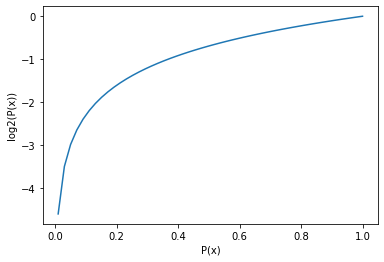

In [ ]:
plt.plot(np.linspace(0.01,1),np.log(np.linspace(0.01,1)))
plt.xlabel("P(x)")
plt.ylabel("log2(P(x))")
plt.show()

Information gain in above case

gain(D, A) = entropy(D)− SUM ( |Di| / |D| * entropy(Di) ), where D is the dataset and A (Di) is the group of the dataset

To know more about Information gain click [here](https://datacadamia.com/data_mining/information_gain)

In [ ]:
# below function returns the information gain
def gain(d, a):
    total = 0
    print ("d is")
    print(d)
    for v in a:
        print("v is " + str(v))
        total += sum(v) / sum(d) * entropy_cal(v)
    gain = entropy_cal(d) - total
    # YOUR CODE HERE to return gain
    return gain

Testing with an example

Consider playing tennis under different conditions

In [ ]:
# example (playTennis)

# set of example of the dataset
playTennis = [9, 5] # Yes, No

In [ ]:
# attribute, number of members (feature)
outlook = [
    [4, 0],  # overcase
    [2, 3],  # sunny
    [3, 2]   # rain
]
print(gain(playTennis, outlook))

d is
[9, 5]
v is [4, 0]
p is 4
total is 0.0
p is 0
v is [2, 3]
p is 2
total is -0.5287712379549449
p is 3
total is -0.9709505944546686
v is [3, 2]
p is 3
total is -0.44217935649972373
p is 2
total is -0.9709505944546686
p is 9
total is -0.40977637753840174
p is 5
total is -0.9402859586706309
0.2467498197744391


In [ ]:
temperature = [
    [2, 2],  # hot
    [3, 1],  # cool
    [4, 2]   # mild
]
print(gain(playTennis, temperature))

d is
[9, 5]
v is [2, 2]
p is 2
total is -0.5
p is 2
total is -1.0
v is [3, 1]
p is 3
total is -0.31127812445913283
p is 1
total is -0.8112781244591328
v is [4, 2]
p is 4
total is -0.38997500048077083
p is 2
total is -0.9182958340544896
p is 9
total is -0.40977637753840174
p is 5
total is -0.9402859586706309
0.029222565658954647


In [ ]:
humidity = [
    [3, 4],  # high
    [6, 1]   # normal
]
print(gain(playTennis, humidity))

d is
[9, 5]
v is [3, 4]
p is 3
total is -0.5238824662870492
p is 4
total is -0.9852281360342515
v is [6, 1]
p is 6
total is -0.19062207543124116
p is 1
total is -0.5916727785823275
p is 9
total is -0.40977637753840174
p is 5
total is -0.9402859586706309
0.15183550136234136


In [ ]:
wind = [
    [6, 2],  # weak
    [3, 3]   # strong
]
print(gain(playTennis, wind))

d is
[9, 5]
v is [6, 2]
p is 6
total is -0.31127812445913283
p is 2
total is -0.8112781244591328
v is [3, 3]
p is 3
total is -0.5
p is 3
total is -1.0
p is 9
total is -0.40977637753840174
p is 5
total is -0.9402859586706309
0.04812703040826927


### Finding the best split using Information gain

Consider the mushroom dataset having 22 features for calculating the Information gain and finding the best feature that has the highest gain

In [ ]:
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


The idea behind building trees is, finding the best feature to split on that generates the largest information gain or provides the least uncertainty in the following leafs. The 2 most known ways to find these features are:

1. Gini Impurity

2. Entropy

#### Gini Impurity

We start at 1 (maximum impurity) and subtract the squared percentage of each label in the data set. As an example, if a data set had 5 items of class (1) and 5 items of class (0), the Gini impurity of the set would be $G=1−(5/10)^2−(5/10)^2$ 

That is the impurity at any given instance/leaf, to find the Weighted Information Gain, you start with the old (root) Gini Impurity and subtract the sum of all weighted Gini Impurities. The weighted Gini Impurity is the same as the Gini Impurity but multiplied by a ratio (weight) which is the number of data points in the new leaf divided by the number of points in the original root.

![gini_impurity_Example](https://cdn.iisc.talentsprint.com/CDS/Images/Gini_Impurity_Example.JPG)

The Weighted Gain for this example  =0.5−(2/10)∗0.5−(5/10)∗0.48−(4/10)∗0.44=0.026

Entropy: Similar to the Gini Impurity but follows a different formula for the calculation:
![entropy_equation](https://cdn.iisc.talentsprint.com/CDS/Images/Entropy_Equation.JPG)

We will still find the information gain, using weighted entropies, and pick the attribute which provided the maximum information gain.

![entropy_equation](https://cdn.iisc.talentsprint.com/CDS/Images/Gain_Equation.JPG)

Let's start by creating 2 functions, one that calculates the entropy and one that calculates the information gain.

In [ ]:
# below function to calculate the entropy
def entropy(labels):
    entropy=0
    # get the element counts of labels
    # YOUR CODE HERE to create label_counts
    label_counts = dict(zip(labels, labels.groupby(labels).count()))
    for label in label_counts:
        prob_of_label = label_counts[label] / len(labels)
        entropy -= prob_of_label * math.log2(prob_of_label)
    # YOUR CODE HERE to return entropy
    return entropy

# below function to calculate the information gain
def information_gain(starting_labels, split_labels):
    # YOUR CODE HERE to create info_gain
    info_gain = entropy(starting_labels)
    for branched_subset in split_labels:
        info_gain -= len(branched_subset) * entropy(branched_subset) / len(starting_labels)
    # YOUR CODE HERE to return info_gain
    return info_gain

Now let's define a function that takes one column at a time and returns list of variants in that column

In [ ]:
# below function to split each variant records of one column i.e. feature
def split(dataset, column):
    split_data = []
    col_vals = data[column].unique() # This tree generation method only works with discrete values
    for col_val in col_vals:
        split_data.append(dataset[dataset[column] == col_val])
    # YOUR CODE HERE to return split_data
    return split_data
    

Now Let's define a function that integrates all the above defined functions and returns the best feature having the highest information gain

In [ ]:
def find_best_split(dataset):
    # YOUR CODE HERE to initialise best_gain with 0
    best_gain = 0
    # YOUR CODE HERE to initialise best_feature with 0
    best_feature = 0
    features = list(dataset.columns)
    # remove the target
    features.remove('class')
    for feature in features:
        split_data = split(dataset, feature)
        # extract labels of each variants in corresponding feature
        split_labels = [dataframe['class'] for dataframe in split_data]
        gain = information_gain(dataset['class'], split_labels)
        if gain > best_gain:
            best_gain, best_feature = gain, feature
    print("best feature: {}  \ninformation gain: {}".format(best_feature, best_gain))
    return best_feature, best_gain

new_data = split(data, find_best_split(data)[0]) # contains a list of dataframes after splitting

best feature: odor  
information gain: 0.92701849879345


Now, a recursive call is needed to keep finding the best split for every new data subset.

### Mutual Information

It provides a measure of the mutual dependence between two random variables. Let $X$ and $Y$ be random variables with probability distributions $pX$ and $pY$ respectively, and $pX,Y$ the joint probability distribution over $(X,Y)$. The base-b mutual information between $X$ and $Y$ is defined as

\begin{split}I(X;Y) &= \sum_{x,y} p_{X,Y}(x,y) \log_b \frac{p_{X,Y}(x,y)}{p_X(x)p_Y(y)}\\
       &= H(X) + H(Y) - H(X,Y).\end{split}

#### Conditional Entropy

The conditional entropy is used to measure the relationship between variables. The following formula gives this measurement:

$H(Y \mid X) = - \sum_{x} \sum_{y} p(x, y) \log_{2} p(y \mid x)$

Let investigate how conditional entropy is related to entropy. Using the above formula, we can conclude that:

$ H(Y \mid X) = H(X, Y) - H(X)$

meaning that the information contained in $Y$ given $X$ equals information jointly contained in $X$ and $Y$ minus the amount of information only contained in $X$.


In [ ]:
def conditional_entropy(p_xy, p_x):
    p_y_given_x = p_xy / p_x
    out = np.nansum(-p_xy * np.log2(p_y_given_x))
    # YOUR CODE HERE to return out
    return out
print(conditional_entropy(np.array([[0.1, 0.5], [0.2, 0.3]]), np.array([0.2, 0.8])))

0.863547202339972


To know more about `np.nansum` click [here](https://numpy.org/doc/stable/reference/generated/numpy.nansum.html)

Knowing conditional entropy means knowing the amount of information contained in $Y$ but not in $X$. Now let see how much information is shared between $X$ and $Y$.

To find the **mutual information** between two random variables $X$ and $Y$, let start the process by finding all the information in both $X$ and $Y$ together and then subtract the part which is not shared. The information both in $X$ and $Y$ is $H(X,Y)$. Subtracting two conditional entropies gives:  $I(X, Y) = H(X, Y) - H(Y \mid X) − H(X \mid Y)$

This means that we have to subtract the information only contained in X and Y from all the information at hand. This relationship is perfectly described by this picture from the d2l.

![mutual_inf](https://cdn.iisc.talentsprint.com/CDS/Images/JointEntropy.JPG)

The concept of mutual information likewise correlation coefficient, allows us to measure the linear relationship between two random variables as well as the amount of maximum information shared between them.

In [ ]:
def mutual_information(p_xy, p_x, p_y):
    p = p_xy / (p_x * p_y)
    out = np.nansum(p_xy * np.log2(p))
    # YOUR CODE HERE to return out
    return out
    
print(mutual_information(np.array([[0.1, 0.5], [0.1, 0.3]]),
                        np.array([0.2, 0.8]),
                        np.array([[0.75, 0.25]])))

0.7194602975157967


We can interpret the mutual information I(X,Y) as the average amount of surprisal by seeing two outcomes happening together compared to what we would expect if they were independent.

Mutual information measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

**Note:** We use `mutual_info_classif()` from sklearn.feature_selection

In [ ]:
# preprocessing - changing the values to numbers with label encoder.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
def Label_enc(features):
    # YOUR CODE HERE
    le.fit(features)
    return le.transform(features)



In [ ]:
# encoding the all the columns
for col in data.columns:
    data[str(col)] = Label_enc(data[str(col)])


Extract features and target from the dataset

In [ ]:
# YOUR CODE BELOW
target = data['class'] #?
features = list(data.columns)
features.remove('class')
features = data[features]
target



Applying `mutual_info_classif` on the data

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(features, target) 
len(mi)
mi

In [ ]:
mi

array([0.03874454, 0.03043113, 0.01924668, 0.13847162, 0.6294273 ,
       0.01069266, 0.06263854, 0.15704903, 0.29301489, 0.        ,
       0.0888468 , 0.20358375, 0.19651144, 0.16858753, 0.16436547,
       0.00707847, 0.01466721, 0.02520293, 0.21767453, 0.33001306,
       0.13772733, 0.11035012])

Add columns to the mutual information values

In [ ]:
mi = pd.Series(mi)
mi.index = features.columns


Let’s observe the Mutual Information with respect to features from the following bar plot.

In [ ]:
# sort the values in the descending order.
# YOUR CODE HERE to sort mi and plot
mi.sort_values(ascending=False)
mi

cap-shape                   0.038745
cap-surface                 0.030431
cap-color                   0.019247
bruises                     0.138472
odor                        0.629427
gill-attachment             0.010693
gill-spacing                0.062639
gill-size                   0.157049
gill-color                  0.293015
stalk-shape                 0.000000
stalk-root                  0.088847
stalk-surface-above-ring    0.203584
stalk-surface-below-ring    0.196511
stalk-color-above-ring      0.168588
stalk-color-below-ring      0.164365
veil-type                   0.007078
veil-color                  0.014667
ring-number                 0.025203
ring-type                   0.217675
spore-print-color           0.330013
population                  0.137727
habitat                     0.110350
dtype: float64

**Conclusion**

In decision trees, at each stage of the process, we split on the variable that maximizes mutual information with the target value. That is, the variable that reduces the uncertainty about the target the most. Say $Y$ is the target value and we have $X_1,\cdots,X_p$. Then we check $I(Y;X_1),\cdots,I(Y;X_p)$. We generally can’t compute these in closed form without knowing the distributions, but we can approximate them using sampling and in some cases other methods: sklearn’s `mutual_info_classif` is one implementation. Once we know the $X_i$ that we want to split on, we need to choose a threshold. We again choose the threshold that maximizes mutual information by minimizing conditional entropy.

To know more about the essence of Information gain in Decision tree, click [here](https://victorzhou.com/blog/information-gain/)

### Please answer the questions below to complete the experiment:




![img](https://cdn.iisc.talentsprint.com/CDS/Images/DataSets_Entropy.JPG)

In [ ]:
# @title Calculate the entropy for dataset 1 and dataset 2 given in above figure ? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "0 and 1" #@param ["","0 and 1","1 and 0", "0 and 0"]

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Was Tough, but I did it" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "I felt concept of entropy and mutual information was explained a bit fast in the class. Needs more discussion" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Not Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Didn't use" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 701
Date of submission:  08 Jul 2021
Time of submission:  12:29:43
View your submissions: https://cds.iisc.talentsprint.com/notebook_submissions
